# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [19]:
import pandas as pd
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
# boston = datasets.load_boston()
# X = pd.DataFrame(boston.data, columns = boston.feature_names)
# y = pd.DataFrame(boston.target, columns = ['MEDV'])

# Carregando os dados de Boston a partir da fonte secundária
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Criando DataFrame para as variáveis explicativas e a variável de resposta
X = pd.DataFrame(data, columns=[
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
])
y = pd.DataFrame(target, columns=['MEDV'])

In [3]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [5]:
# Verificando informações sobre o DataFrame de variáveis explicativas
print("Informações sobre o DataFrame X:")
print(X.info())

# Verificando as primeiras linhas do DataFrame de variáveis explicativas
print("\nPrimeiras linhas do DataFrame X:")
print(X.head())

# Verificando informações sobre o DataFrame de variável de resposta
print("\nInformações sobre o DataFrame y:")
print(y.info())

# Verificando as primeiras linhas do DataFrame de variável de resposta
print("\nPrimeiras linhas do DataFrame y:")
print(y.head())


Informações sobre o DataFrame X:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None

Primeiras linhas do DataFrame X:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX   
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0  \
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  2

### DataFrame - X

* Possui 506 Linhas e 13 Colunas.
* Não possui valores ausentes.
* Todas as colunas são do tipo FLOAT64.


### DataFrame - y

* Possui 506 Linhas e 1 Coluna (Variável TARGET).
* Não possui valores ausentes.
* A Coluna MEDV é do tipo FLOAT64.

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

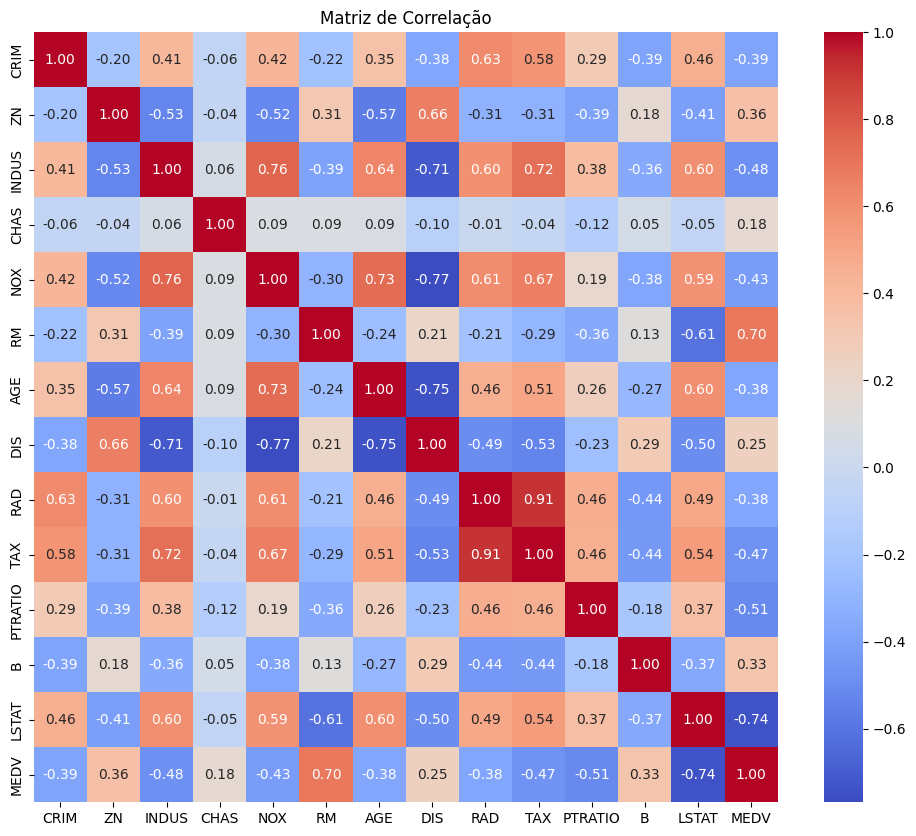

In [8]:
# Concatenando as variáveis explicativas e a variável de resposta para criar a matriz de correlação
data_with_target = pd.concat([X, y], axis=1)

# Calculando a matriz de correlação
correlation_matrix = data_with_target.corr()

# Criando o heatmap da matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

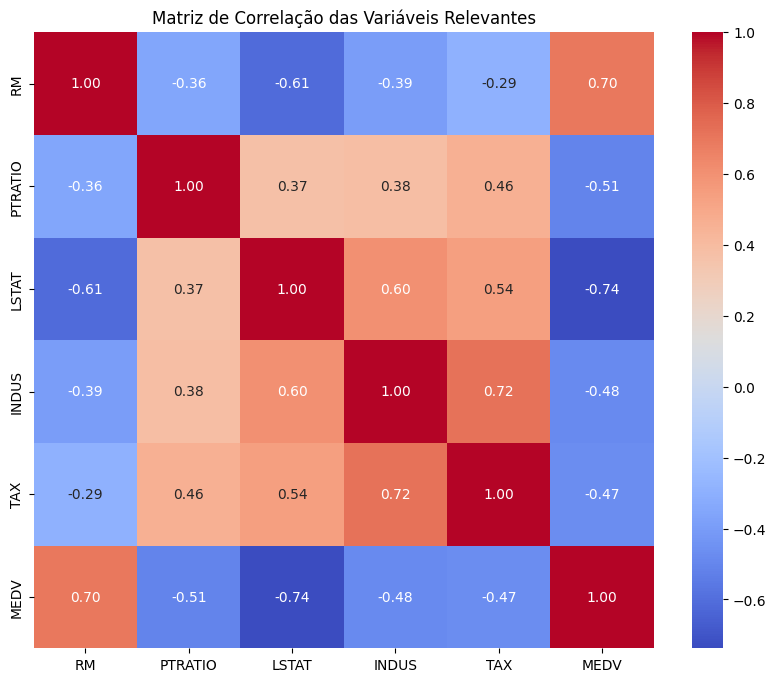

In [9]:
# LIMPANDO O GRÁFICO, PARA VER APENAS AS RELEVANTES

# Selecionando apenas as variáveis explicativas relevantes e a variável de resposta (MEDV)
relevant_columns = ['RM', 'PTRATIO', 'LSTAT', 'INDUS', 'TAX', 'MEDV']
data_with_target_relevant = data_with_target[relevant_columns]

# Calculando a matriz de correlação para as variáveis selecionadas
correlation_matrix_relevant = data_with_target_relevant.corr()

# Criando o heatmap (mapa de calor) da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_relevant, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Relevantes")
plt.show()

### RM

* Correlação: Positiva forte com MEDV.
* Interpretação: Casas com mais quartos tendem a ter um valor mediano mais alto.

### LSTAT

* Correlação: Negativa forte com MEDV.
* Interpretação: Áreas com uma proporção maior de pessoas em status inferior tendem a ter casas com valor mediano mais baixo.

### PTRATIO 

* Correlação: Negativa moderada com MEDV.
* Interpretação: Há uma influência negativa no valor mediano das casas em áreas com uma maior proporção aluno-professor.

### INDUS 

* Correlação: Negativa moderada com MEDV.
* Interpretação: Áreas com uma maior proporção de negócios não varejistas e taxas de impostos mais altas tendem a ter casas com valor mediano mais baixo.

### 3. Separe os dados em validação e teste

In [10]:
# Separando os dados em variáveis explicativas (X) e variável de resposta (y)
X = data_with_target_relevant.drop(columns=['MEDV'])
y = data_with_target_relevant['MEDV']

# Dividindo os dados em conjuntos de treinamento (validação) e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificando o tamanho dos conjuntos de treinamento e teste
print("Tamanho do conjunto de treinamento (validação):", X_train.shape[0])
print("Tamanho do conjunto de teste:", X_test.shape[0])

Tamanho do conjunto de treinamento (validação): 354
Tamanho do conjunto de teste: 152


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [11]:
# Criando o modelo da árvore com profundidade máxima 8
tree_max_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_depth_8.fit(X_train, y_train)

# Criando o modelo da árvore com profundidade máxima 2
tree_max_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max_depth_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [17]:
# Calculando o MSE da árvore com profundidade máxima
tree_max_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_max_depth_8.fit(X_train, y_train)

tree_max_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_max_depth_2.fit(X_train, y_train)

y_pred_train_max_depth_8 = tree_max_depth_8.predict(X_train)
mse_train_max_depth_8 = mean_squared_error(y_train, y_pred_train_max_depth_8)

y_pred_test_max_depth_8 = tree_max_depth_8.predict(X_test)
mse_test_max_depth_8 = mean_squared_error(y_test, y_pred_test_max_depth_8)

y_pred_train_max_depth_2 = tree_max_depth_2.predict(X_train)
mse_train_max_depth_2 = mean_squared_error(y_train, y_pred_train_max_depth_2)

y_pred_test_max_depth_2 = tree_max_depth_2.predict(X_test)
mse_test_max_depth_2 = mean_squared_error(y_test, y_pred_test_max_depth_2)
# Exibindo os resultados
print("MSE da árvore com profundidade máxima 8 - Treinamento: {:.2f}".format(mse_train_max_depth_8))
print("MSE da árvore com profundidade máxima 8 - Teste: {:.2f}".format(mse_test_max_depth_8))
print()
print("MSE da árvore com profundidade máxima 2 - Treinamento: {:.2f}".format(mse_train_max_depth_2))
print("MSE da árvore com profundidade máxima 2 - Teste: {:.2f}".format(mse_test_max_depth_2))

MSE da árvore com profundidade máxima 8 - Treinamento: 2.19
MSE da árvore com profundidade máxima 8 - Teste: 14.47

MSE da árvore com profundidade máxima 2 - Treinamento: 26.41
MSE da árvore com profundidade máxima 2 - Teste: 24.15


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Uma árvore com profundidade 8 pode indicar uma tendência à memorização dos dados de treinamento, resultando em uma menor capacidade de generalização para novos dados. Por outro lado, uma árvore de profundidade 2 sugere um equilíbrio maior, proporcionando a capacidade de fazer previsões precisas tanto para dados conhecidos quanto para novos dados.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

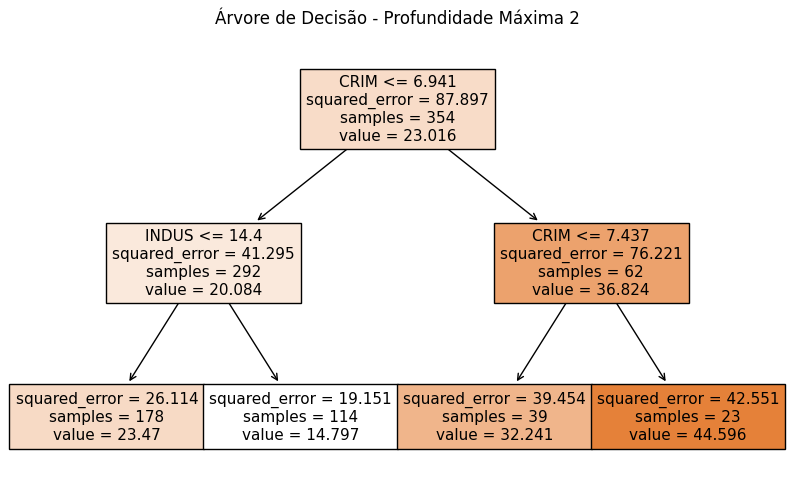

In [20]:
# Visualizando a árvore
plt.figure(figsize=(10, 6))
plot_tree(tree_max_depth_2, feature_names=X.columns, filled=True)
plt.title("Árvore de Decisão - Profundidade Máxima 2")
plt.show()

A variável RM demonstra uma habilidade superior em segmentar os registros em grupos distintos, sugerindo ser uma variável mais impactante na formulação das previsões iniciais da árvore.